# **Ridge Regression**

Lasso regression—also known as **L2 regularization**—is a form of regularization for linear regression models in which a small amount of bias is introduced so that we can get better long-term predictions. It corrects for overfitting on training data in machine learning models.<br>
The ridge regression equation is given as: <br>
`β = (X^T X + λI)^-1 X^T Y` <br>
where,
- β represents the vector of regression coefficients.
- X is the predictor variable matrix.
- Y is the dependent variable vector.
- I is the identity matrix.
- λ parameter controls the amount of shrinkage applied.

In [1]:
import numpy as np

class RidgeRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, alpha=1.0):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.alpha = alpha  # Regularization strength
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y.ravel())) + (self.alpha / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_predicted - y.ravel())

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Mean Squared Error: 0.6907992382328507


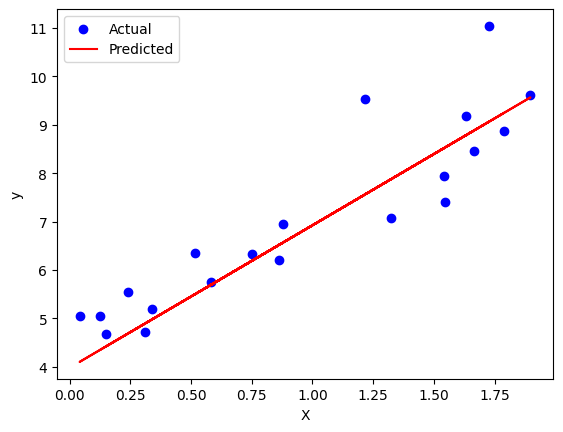

In [2]:
# testing a case
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    import matplotlib.pyplot as plt

    # simple linear dataset
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regressor = RidgeRegression(learning_rate=0.01, n_iterations=1000, alpha=0.1)
    regressor.fit(X_train, y_train)

    predictions = regressor.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse}')

    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, predictions, color='red', label='Predicted')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()